In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = [1, 3, 4.5, 5.5]
y = [2.5, 3, 3, 3.5]

In [3]:
m = len(y)

X = np.zeros((m, 2))

In [4]:
X

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [5]:
X[: ,0] = 1

In [6]:
X

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [7]:
X[: ,1] = x

In [8]:
X

array([[1. , 1. ],
       [1. , 3. ],
       [1. , 4.5],
       [1. , 5.5]])

In [9]:
y = np.array(y)

In [10]:
y

array([2.5, 3. , 3. , 3.5])

In [11]:
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [12]:
theta

array([2.31521739, 0.19565217])

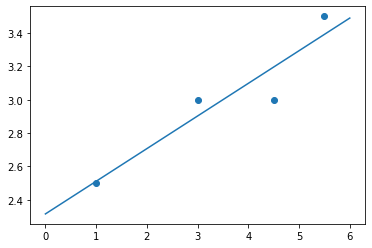

In [13]:
plt.scatter(x, y)
a = np.linspace(0, 6, 2)
b = theta[0] + a * theta[1]
plt.plot(a , b)

In [14]:
np.linspace(0, 6, 2)

array([0., 6.])

In [15]:
def h(theta, x):
    return theta[0] + theta[1] * x

In [16]:
def gradient_step(theta, x, y, alpha, verbose=False):
    if verbose: print("Gradient step ", theta, x, y, alpha)
    delta = np.zeros(np.shape(theta))
    m = len(y)
    for i in range(m):
        delta[0] -= (2/float(m)) * (y[i] - h(theta, x[i]))
        delta[1] -= (2/float(m)) * (y[i] - h(theta, x[i])) * x[i]
        if verbose: print(i, delta)
    if verbose:
        print("Theta", theta - alpha * delta)
        print("Cost", sum(1/(2*m) * np.square(h(theta, np.array(x)) - np.array(y))))
    return theta - alpha * delta

def gradient_descent(x, y, initial_theta, alpha, iterations, verbose=False):
    theta = initial_theta
    for i in range(iterations):
        if verbose: print("** Iteration ", i)
        theta = gradient_step(theta, x, y, alpha, verbose)
    return theta

In [17]:
# let's implement a threshold

In [18]:
def gradient_step_t(theta, x, y, alpha, verbose=False):
    if verbose: print("Gradient step ", theta, x, y, alpha)
    delta = np.zeros(np.shape(theta))
    m = len(y)
    for i in range(m):
        delta[0] -= (2/float(m)) * (y[i] - h(theta, x[i]))
        delta[1] -= (2/float(m)) * (y[i] - h(theta, x[i])) * x[i]
        if verbose: print(i, delta)
    if verbose:
        print("Theta", theta - alpha * delta)
        print("Cost", sum(1/(2*m) * np.square(h(theta, np.array(x)) - np.array(y))))
    return theta - alpha * delta

def gradient_descent_t(x, y, initial_theta, theta_threshold, alpha, max_iterations, verbose=False):
    theta = initial_theta
    old_theta = initial_theta
    for i in range(max_iterations):
        if verbose: print("** Iteration ", i)
        old_theta = theta
        theta = gradient_step_t(theta, x, y, alpha, verbose)
        if np.abs(theta[0] - old_theta[0]) < theta_threshold[0] and np.abs(theta[1] - old_theta[1]) < theta_threshold[1]:
            return theta, i
    return theta

In [19]:
# even more elegant solution (vectorized)

In [20]:
def gradient_step_t(theta, x, y, alpha, verbose=False):
    if verbose: print("Gradient step ", theta, x, y, alpha)
    delta = np.zeros(np.shape(theta))
    m = len(y)
    for i in range(m):
        delta[0] -= (2/float(m)) * (y[i] - h(theta, x[i]))
        delta[1] -= (2/float(m)) * (y[i] - h(theta, x[i])) * x[i]
        if verbose: print(i, delta)
    if verbose:
        print("Theta", theta - alpha * delta)
        print("Cost", sum(1/(2*m) * np.square(h(theta, np.array(x)) - np.array(y))))
    return theta - alpha * delta

def gradient_descent_t(x, y, initial_theta, theta_threshold, alpha, max_iterations, verbose=False):
    theta = initial_theta
    old_theta = initial_theta
    for i in range(max_iterations):
        if verbose: print("** Iteration ", i)
        old_theta = theta
        theta = gradient_step_t(theta, x, y, alpha, verbose)
        if (np.abs(theta - old_theta) < theta_threshold).all():
            return theta, i
    return theta

In [21]:
gradient_descent_t(x, y, np.array([0, 0]), np.array([0.0001, 0.0001]), 0.01, 10_000)

(array([2.28764226, 0.20211019]), 1205)

In [22]:
# let's vectorize the whole thing

In [23]:
def cost_2(theta, x, y):
    m = np.size(y)
    return sum(1/(2*m) * np.square(h2(theta, np.array(x)) - np.array(y)))

def h2(theta, x):
    X = np.ones([len(x),len(theta)])
    X[:,1] = x
    return X.dot(theta.T)

def linear_cost_prime(hyp, theta, x, y):
    delta = np.zeros(np.shape(theta))
    delta[0] -= (2/float(m)) * sum((y - hyp(theta, x)))
    delta[1] -= (2/float(m)) * sum((y - hyp(theta, x)) * x)
    return delta

def gradient_descent_2(hyp, cost, cost_prime, x, y, theta, alpha, iterations, verbose=False):
    cost_history = []
    delta = np.zeros(np.shape(theta))
    for i in range(iterations):
        if verbose: print("** Iteration ", i)
        delta = cost_prime(hyp, theta, x, y)
        theta = theta - alpha * delta
        cost_history.append(cost(theta, x, y))
    return theta, cost_history

In [24]:
theta, cost_history = gradient_descent_2(h2, cost_2, linear_cost_prime, x, y, np.array([0, 0]), 0.05, 5000)

In [25]:
theta

array([2.31521739, 0.19565217])

Text(0, 0.5, 'Cost')

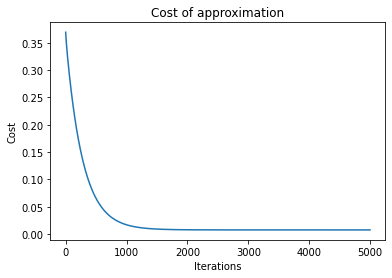

In [26]:
x_axis = np.linspace(0, 5000, 500)
plt.plot(x_axis, cost_history[5:505])
plt.title("Cost of approximation")
plt.xlabel("Iterations")
plt.ylabel("Cost")

In [27]:
x = [1, 3, 4.5, 5.5]
y = [2.5, 3, 3, 3.5]
X, y = np.array(x).reshape(-1, 1), np.array(y)

In [28]:
X

array([[1. ],
       [3. ],
       [4.5],
       [5.5]])